### Half-Life of Mean Reversion

The statistical tests I described for mean reversion or stationarity are very demanding, with their requirements of at least 90 percent certainty. But in practical trading, we can often be profitable with much less certainty. In this section, we shall find another way to interpret the $λ$ coefficient in Equation 2.1 so that we know whether it is negative enough to make a trading strategy practical, even if we cannot reject the null hypothesis that its actual value is zero with 90 percent certainty in an ADF test.We shall find that $λ$ is a measure of how long it takes for a price to mean revert.

To reveal this new interpretation, it is only necessary to transform the discrete time series Equation 2.1 to a differential form so that the changes in prices become infinitesimal quantities. Furthermore, if we ignore the drift $(βt)$ and the lagged differences $(Δy(t − 1), ..., Δy(t − k))$ in Equation 2.1, then it becomes recognizable in stochastic calculus as the Ornstein-Uhlenbeck formula for mean-reverting process:

$$
dy(t) = (λy(t − 1) + μ)dt + dε \;\;\;\;\; (2.5)
$$

where $dε$ is some Gaussian noise. In the discrete form of 2.1, linear regression of $Δy(t)$ against $y(t − 1)$ gave us $λ$, and once determined, this value of $λ$ carries over to the differential form of 2.5. But the advantage of writing the equation in the differential form is that it allows for an analytical solution for the expected value of $y(t)$:

$$
E(y(t))=y_0exp(λt)−μ/λ(1−exp(λt)) \;\;\;\;\; (2.6)
$$

Remembering that $λ$ is negative for a mean-reverting process, this tells us that the expected value of the price decays exponentially to the value $−μ/λ$ with the half-life of decay equals to $−log(2)/λ$. This connection between a regression coefficient λ and the half-life of mean reversion is very useful to traders. First, if we find that λ is positive, this means the price series is not at all mean reverting, and we shouldn’t even attempt to write a mean-reverting strategy to trade it. Second, if λ is very close to zero, this means the half-life will be very long, and a mean-reverting trading strategy will not be very profitable because we won’t be able to complete many round-trip trades in a given time period. Third, this λ also determines a natural time scale for many parameters in our strategy. For example, if the half life is 20 days, we shouldn’t use a look-back of 5 days to compute a moving average or standard deviation for a mean-reversion strategy. Often, setting the look- back to equal a small multiple of the half-life is close to optimal, and doing so will allow us to avoid brute-force optimization of a free parameter based on the performance of a trading strategy.We will demonstrate how to compute half-life in Example 2.4.

### Example 2.4: Computing Half-Life for Mean Reversion

We concluded in the previous example that the price series USD.CAD is not stationary with at least 90 percent probability. But that doesn’t necessarily mean we should give up trading this price series using a mean reversion model because most profitable trading strategies do not require such a high level of certainty. To determine whether USD.CAD is a good candidate for mean reversion trading, we will now determine its half-life of mean reversion.

To determine λ in Equations 2.1 and 2.5, we can run a regression fit with $y(t) − y(t − 1)$ as the dependent variable and $y(t − 1)$ as the independent variable. The regression function [ols](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) is included in statsmodels module.

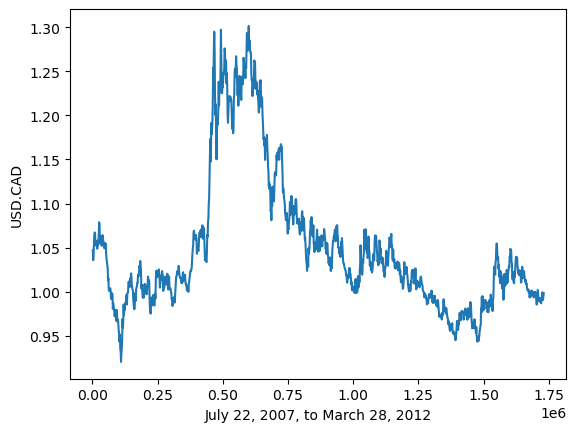

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS

df=pd.read_csv('inputData_USDCAD.csv')

y=df.loc[df['Time']==1659, 'Close']

plt.xlabel("July 22, 2007, to March 28, 2012")
plt.ylabel("USD.CAD")
plt.plot(y)

**FIGURE 2.2** USD.CAD Price Series

In [2]:
prevy = y.shift()
dy = y - prevy
dy = dy[1:, ]
prevy = prevy[1:, ]

model = OLS(dy, prevy - np.mean(prevy))
results = model.fit()
theta = results.params
theta.values[0]

-0.006016391085996261

In [3]:
halflife = -np.log(2) / theta
halflife.values[0]

115.2097944851546

The result is about 115 days. Depending on your trading horizon, this may or may not be too long. But at least we know what look-back to use and what holding period to expect.